# Steps



*   Loading the data
*   Checking the size of images
*   Checking the image by their pixel intensity
*   Appending their size into dataframe
*   Get the count of data according to their class
*   Visualizing the dataset according to their classwise
*   Applying rotatin [0,90,180,270] on dataset



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
import tensorflow as tf
from PIL import Image

In [ ]:
#Loading the train and test dir
train_dir =  '/content/drive/MyDrive/Continental_task/Dataset/train/'
train_list = os.listdir(train_dir)
test_dir =  '/content/drive/MyDrive/Continental_task/Dataset/test'
test_list = os.listdir(test_dir)
#Assigning the labels to each folder data in train & test dir
""" There are 121 categories of flowers in both dir"""
labels   =   {"21": "fire lily", "3": "canterbury bells", 
             "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", 
             "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", 
             "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", 
             "39": "siam tulip", "24": "red ginger", "67": "spring crocus", 
             "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", 
             "6": "tiger lily", "93": "ball moss", "33": "love in the mist", "9": "monkshood", 
             "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", 
             "100": "blanket flower", "13": "king protea", "49": "oxeye daisy",
             "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", 
             "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", 
             "69": "windflower", "62": "japanese anemone", 
             "20": "giant white arum lily", "38": "great masterwort", 
             "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", 
             "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
             "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", 
             "99": "bromelia", "87": "magnolia", "5": "english marigold", "92": "bee balm", 
             "28": "stemless gentian", "97": "mallow", "57": "gaura", "40": "lenten rose", 
             "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium", 
             "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", 
             "71": "gazania", "90": "canna lily", "18": "peruvian lily", "98": "mexican petunia", 
             "8": "bird of paradise", "30": "sweet william", "17": "purple coneflower", 
             "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon", 
             "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", 
             "53": "primula", "72": "azalea", "65": "californian poppy", "80": "anthurium", 
             "76": "morning glory", "37": "cape flower", "56": "bishop of llandaff", 
             "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple", 
             "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", 
             "78": "lotus lotus", "88": "cyclamen", "94": "foxglove", "81": "frangipani", 
             "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower", 
             "77": "passion flower", "51": "petunia"}

In [ ]:
# adding the image_size 
#creating two dataframes for train and test dir 
train_df = pd.DataFrame(columns=['Image_Path', 'Label', 'Class_Name', 'Width', 'Height'])
test_df = pd.DataFrame(columns=['Image_Path', 'Label', 'Class_Name', 'Width', 'Height'])

# train dir dataframe
for dataset in train_list:
    img_list = os.listdir(os.path.join(train_dir,dataset))
    label = labels[dataset]
    num_img_files = len(img_list)
    train_files=0    
    for i in range(num_img_files):
        img_name = img_list[i]
        img_filename = os.path.join(train_dir,dataset,img_name)
        try:
            input_img = cv2.imread(img_filename)
            img_shape=input_img.shape
            width, height = img_shape[0], img_shape[1]
            train_df = train_df.append({'Image_Path': img_filename, 'Label': label,'Class_Name': dataset, 'Width': width, 'Height': height},ignore_index=True)       
        except:
            train_files+=1
Output_path= '/content/drive/MyDrive/Continental_task/Dataset'
train_df.to_csv(os.path.join(Output_path,'train.csv'))
print('The train csv file is saved.')

# test dir dataframe
for dataset in test_list:
    img_list = os.listdir(os.path.join(test_dir,dataset))
    label = labels[dataset]
    num_img_files = len(img_list)
    test_files=0    
    for i in range(num_img_files):
        img_name = img_list[i]
        img_filename = os.path.join(test_dir,dataset,img_name)
        try:
            input_img = cv2.imread(img_filename)
            img_shape=input_img.shape
            train_df = test_df.append({'Image_Path': img_filename, 'Label': label,'Class_Name': dataset},ignore_index=True)       
        except:
            test_files+=1
Output_path= '/content/drive/MyDrive/Continental_task/Dataset'
test_df.to_csv(os.path.join(Output_path,'test.csv'))
print('The test csv file is saved.')
#print('Total number of currupted files in train_csv = {} and test_csv = {}'.format(train_files,test_files))

The train csv file is saved.


In [ ]:
train_df.head(50)

,Image_Path,Label,Class_Name,Width,Height
0,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,500,529
1,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,626,500
2,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,500,666
3,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,683,500
4,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,500,624
5,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,624,500
6,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,684,500
7,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,500,749
8,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,500,667
9,/content/drive/MyDrive/Continental_task/Datase...,canterbury bells,3,500,770


In [ ]:
# Information about data
train_df = pd.read_csv('/content/drive/MyDrive/Continental_task/Dataset/train.csv')
print('Information about training dataframe')
print(train_df.info())

Information about training dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6551 entries, 0 to 6550
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6551 non-null   int64 
 1   Image_Path  6551 non-null   object
 2   Label       6551 non-null   object
 3   Class_Name  6551 non-null   int64 
 4   Width       6551 non-null   int64 
 5   Height      6551 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 307.2+ KB
None


In [ ]:
# checking the shape of images
img = cv2.imread(train_df['Image_Path'][0])
print('Shape of image :',img.shape)

Shape of image : (500, 529, 3)


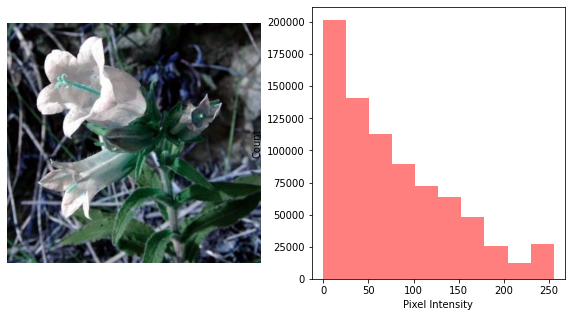

In [ ]:
# Checking the intensity per pixel
def plotHist(img):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.axis('off')
  histo = plt.subplot(1,2,2)
  histo.set_ylabel('Count')
  histo.set_xlabel('Pixel Intensity')
  plt.hist(img.flatten(), bins=10, lw=0, alpha=0.5, color='r')

plotHist(img)

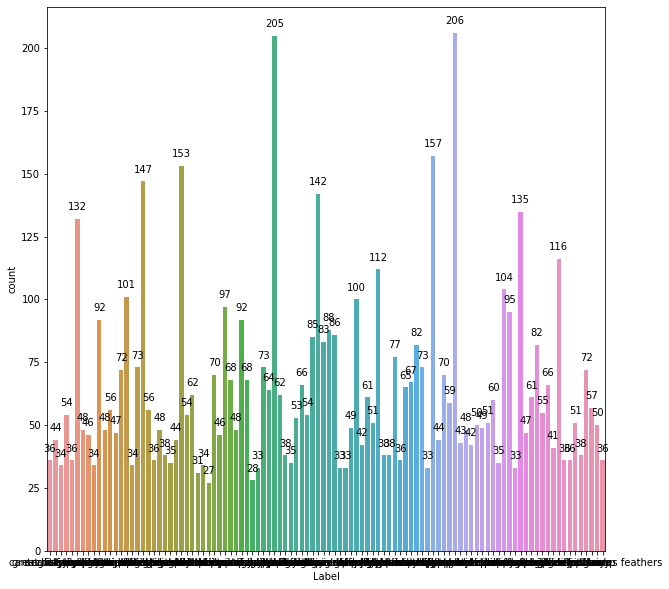

In [ ]:
# Distribution of training data accrding to their class
plt.figure(figsize=(10,10))
ax=sns.countplot(data=train_df,x='Label')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3.5 ,'{}'.format(height),ha="center")

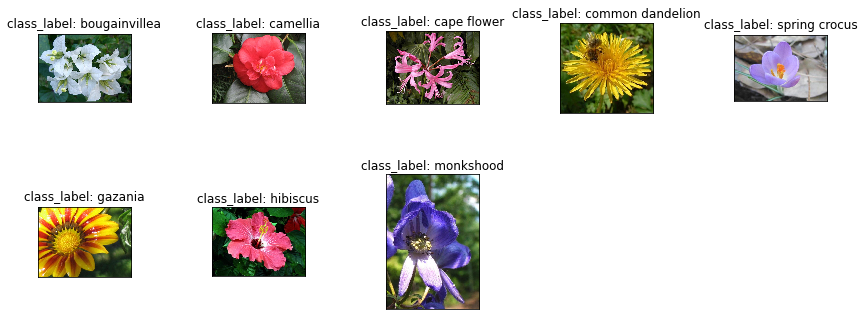

In [ ]:
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
  idx = random.randint(0, len(train_df))
  train_data = train_df.iloc[idx]
  x = cv2.imread(train_data[0])
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x[:,:,::-1], interpolation='none')
  plt.title("class_label: {}".format(train_data[1]))
  plt.xticks([])
  plt.yticks([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

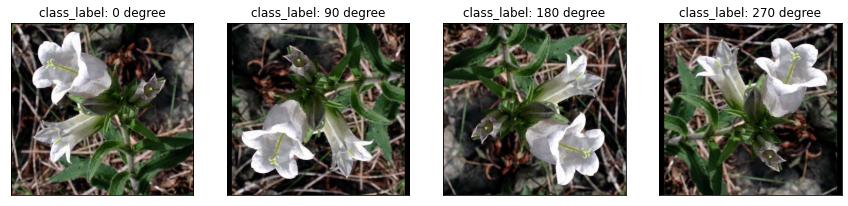

In [ ]:
# Applying rotation on datasets
def rotate_img(img, rot):
    if rot == 0:  
        return img
    elif rot == 90: 
        return img.rotate(90)
    elif rot == 180:  
        return img.rotate(180)
    elif rot == 270: 
        return img.rotate(270)

data = train_df.iloc[0]
img_0 = cv2.imread(data[0])
img_0 = Image.open(data[0])
img_1 = rotate_img(img_0,90)
img_2 = rotate_img(img_0,180)
img_3 = rotate_img(img_0,270)

img = [img_0,img_1,img_2,img_3]
img = np.array(img)
class_labels = ['0 degree','90 degree','180 degree','270 degree']

fig = plt.figure(1,figsize=(12,12))
for i in range(4):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(img[i])
  plt.title("class_label: {}".format(class_labels[i]))
  plt.xticks([])
  plt.yticks([])
plt